<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT22/blob/main/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Differential equations**
**Marc Hétier**

# **Abstract**

On this lab, we implemente methods to initial value problem of the form :
$$ \begin{cases} \frac{du}{dt} = f(u,t) \text{ for $t \in [0, T]$}\\ u(0) = u_0 \end{cases} $$

where u can be scalar or has multiple dimension. A lot of different methods exist (finite element, finite volume, finite differences) and for each of them a lot of different scheme can be used. We will only focus on the most basic one, and use finite difference an Euler schemes.

On the second part, we make the things a little more complicated and introduce some stochasticity on $f(u,t)$

In [6]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [7]:
# Load neccessary modules.
# from google.colab import files
import numpy as np
from scipy.linalg import expm
from matplotlib import pyplot as plt

# **Introduction**

The main idea behind finite difference method is to approximate all the derivatives involve in the equation by Taylor expansions, truncated at some level. Often, more than one Taylor expansion is involved for the same derivative, in order to get higher degree of approximation. Those expansion are made around some particular point, which layes on a stencil (or mesh).

For equation $$ \begin{cases} \frac{du}{dt} = f(u,t) \text{ for $t \in [0, T]$}\\ u(0) = u_0 \end{cases} $$ we only need to approximate a derivative with respect to time. We then define the stencil corresponding to the points $t_n = n \Delta t$ for a given $\Delta t$. Then, using a Taylor expansion on point $t_{n+1}$ we get :
$$ u(t_{n+1}) = u(t_n) + \Delta t \frac{du}{dt}(t_n) + \mathcal{O}(\Delta t^2)$$
Using this expression on the problem, we obtain :
\begin{align*}
\frac{du}{dt}(t_n) &= \frac{u(t_{n+1}) - u(t_n)}{\Delta t} +  \mathcal{O}(\Delta t)) = f(u(t_n), t_n)\\
u(t_{n+1}) & \simeq u(t_n) + \Delta t f(u(t_n), t_n)
\end{align*}

This gives a recursive formula to compute $u(t_{n+1})$ from $u(t_n)$. We call it **Explicit Euler**.

An other method is based on the same Taylor expansion, but made at time $t_{n}$:
$$ u(t_{n}) = u(t_{n+1}) - \Delta t \frac{du}{dt}(t_{n+1}) + \mathcal{O}(\Delta t^2)$$
As before, we obtain a recursive formula to compute $u(t_{n+1}) :
$$ u(t_{n+1}) \simeq u(t_n) + \Delta t f(u(t_{n+1}), t_{n+1}) $$

This gives **Implicit Euler** method. Note that the recursive formula is more complicated than before, since $u_{n+1}$ also appears inside the $f$ function. An equation need to be solved.

In a first time, I will implement those methods in a generic way, and then apply them on a classical problem.

# **Method**

## Explicit Euler

In [8]:
def explicit_euler(u0, f, dt, n):
    """
    Input : initial value u0, function f, time step dt and final time T
    Output : approximation of the solution of du/dt = f(u,t)
    """
    U = np.zeros((len(u0), n+1))
    U[:,0] = u0
    for k in range(1,n+1):
        U[:,k] = U[:,k-1] + dt*f(U[:,k-1], (k-1)*dt)
    
    return U 

## Implicit Euler

In [9]:
def implicit_euler(u0, f, dt, n, solve_eq):
    """
    Input : initial value u0, function f, time step dt a final time T, a function to solve x = u_n + f(x,t)
    Output : approximation of the solution of du/dt = f(u,t)
    """
    U = np.zeros((len(u0), n+1))
    U[:,0] = u0
    for k in range(1,n+1):
        ft = lambda x : f(x,k*dt)
        U[:,k] = solve_eq(U[:,k-1], ft)    
    return U 

## Problem 1 : Scalar case
Here, we consider the case where $u$ is scalar. We will solve the classical problem :
$$ \begin{cases} \frac{du}{dt} = a u \text{ for $t \in [0, T]$}\\ u(0) = 1 \end{cases} $$ 
*ie* $f(u,t) = a u$.
The exact solution is given by $u(t) = \exp(at)$.

In this case, the equation we need to solve for implicit method is very simple, corresponding to $x = u_n + \Delta t \;a \; x$ and has solution $x = u_n/(1-a\Delta t)$.

The script below solve the problem using both Euler methods, for two different values of $\Delta t$. This allow us to compare the results and to investigate the stability of the methods when $\Delta t$ varies. By a theoretical analysis, we know that the implicit method is always stable, while the explicit method is stable only when $|1 + a \; \Delta t| <1$. We will if the numerical experiment confirm that.

Norm of the difference (\Delta t = 0.1) : 

   -Explicit Euler :  0.21160539552547342

   -Implicit Euler :  0.1558170391207449

Norm of the difference (\Delta t = 0.5) : 

   -Explicit Euler :  77.35559550589332

   -Implicit Euler :  0.21826666683041712


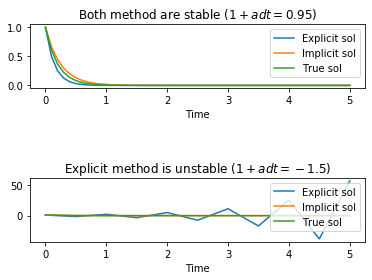

In [10]:
a = -5
f = lambda x,t :a*x
solve = lambda y, z:y/(1-dt*a)
u0 = np.array([1])

# Stable case
dt = 0.1
T = 5
n = int(T/dt)
time_st = np.linspace(0,T, n+1)
u_exp_euler_st = explicit_euler(u0, f, dt, n)
u_imp_euler_st = implicit_euler(u0, f, dt, n, solve)
u_true_st = np.exp(a*time_st)

print("Norm of the difference (\Delta t = 0.1) : ")
print("\n   -Explicit Euler : ", np.linalg.norm(u_true_st-u_exp_euler_st))
print("\n   -Implicit Euler : ", np.linalg.norm(u_true_st-u_imp_euler_st))


# Unstable case
dt = 0.5
T = 5
n = int(T/dt)
time = np.linspace(0,T, n+1)
u_exp_euler = explicit_euler(u0, f, dt, n)
u_imp_euler = implicit_euler(u0, f, dt, n, solve)
u_true = np.exp(a*time)

print("\nNorm of the difference (\Delta t = 0.5) : ")
print("\n   -Explicit Euler : ", np.linalg.norm(u_true-u_exp_euler))
print("\n   -Implicit Euler : ", np.linalg.norm(u_true-u_imp_euler))

# Plot
plt.subplot(3,1,1)
plt.plot(time_st, u_exp_euler_st[0,:])
plt.plot(time_st, u_imp_euler_st[0,:])
plt.plot(time_st, u_true_st)
plt.legend(("Explicit sol", "Implicit sol", "True sol"))
plt.xlabel('Time')
plt.title("Both method are stable $(1+a dt = 0.95)$")

plt.subplot(3,1,3)
plt.plot(time, u_exp_euler[0,:])
plt.plot(time, u_imp_euler[0,:])
plt.plot(time, u_true)
plt.legend(("Explicit sol", "Implicit sol", "True sol"))
plt.xlabel('Time')
plt.title("Explicit method is unstable $(1+a dt = -1.5)$")

plt.show()

The numerical experiment seems to confirm the stability domains of the methods. We can also see that even if the time step is quite large ($\Delta t = 0.1$), for the stable case, the approximated solutions looks quite good. The worst part being obviously when there is big variations (*ie* at the begining). The implicit solution seems also better than the explicit one.

## Problem 2 : Multidimensional case
Here, we consider the case where $u$ is a vector. We will solve the classical problem :
$$ \begin{cases} \frac{du}{dt} = A u \text{ for $t \in [0, T]$}\\ u(0) = u_0 \end{cases} $$ 
*ie* $f(u,t) = A u$, where A is a matrix. 
The exact solution is given by $u(t) = \exp(At) u_0$.

In this case, the equation we need to solve for implicit method is very simple, corresponding to $x = u_n + \Delta t \;A \; x$ and has solution $x = (I_n-\Delta t A)^{-1} u_n$.

The script below solve the problem using both Euler methods, for two different values of $\Delta t$. This allow us to compare the results and to investigate the stability of the methods when $\Delta t$ varies. By a theoretical analysis, we know that the implicit method is always stable, while the explicit method is stable only when $|1 + \lambda_k \; \Delta t| <1$ for each eigenvalue $\lambda_k$ of $A$. We will if the numerical experiment confirm that.

Norm of the difference (\Delta t = 0.005) : 

   -Explicit Euler :  0.9218303669374501

   -Implicit Euler :  0.9047030081650087

Norm of the difference (\Delta t = 1) : 

   -Explicit Euler :  64.55794294403114

   -Implicit Euler :  3.9110530201290774


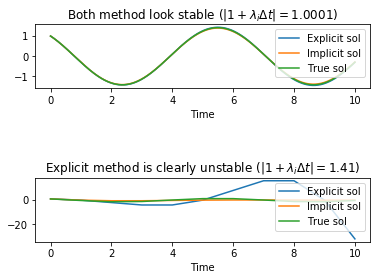

In [11]:
# Constant of the problem
A = np.array([[0, -1], [1,0]])
f = lambda x,t : A @ x
solve = lambda Y, z: np.linalg.solve(np.eye(2) - dt*A, Y)
u0 = np.array([1, 1])

def true_sol(time, A, U_0):
    U = np.zeros((2, len(time)))
    for k,t in enumerate(time):
        U[:,k] = expm(t*A)@U_0
    return U

# Stable case
dt = 0.005
T = 10
n = int(T/dt)
time_st = np.linspace(0,T, n+1)
u_exp_euler_st = explicit_euler(u0, f, dt, n)
u_imp_euler_st = implicit_euler(u0, f, dt, n, solve)
u_true_st = true_sol(time_st, A, u0)

print("Norm of the difference (\Delta t = 0.005) : ")
print("\n   -Explicit Euler : ", np.linalg.norm(u_true_st-u_exp_euler_st))
print("\n   -Implicit Euler : ", np.linalg.norm(u_true_st-u_imp_euler_st))

# Unstable case
dt = 1
T = 10
n = int(T/dt)
time = np.linspace(0,T, n+1)
u_exp_euler = explicit_euler(u0, f, dt, n)
u_imp_euler = implicit_euler(u0, f, dt, n, solve)
u_true = true_sol(time, A, u0)

print("\nNorm of the difference (\Delta t = 1) : ")
print("\n   -Explicit Euler : ", np.linalg.norm(u_true-u_exp_euler))
print("\n   -Implicit Euler : ", np.linalg.norm(u_true-u_imp_euler))

# Plot
plt.subplot(3,1,1)
plt.plot(time_st, u_exp_euler_st[0,:])
plt.plot(time_st, u_imp_euler_st[0,:])
plt.plot(time_st, u_true_st[0,:])
plt.legend(("Explicit sol", "Implicit sol", "True sol"))
plt.xlabel('Time')
plt.title("Both method look stable $(|1+ \lambda_i \Delta t| = 1.0001)$")


plt.subplot(3,1,3)
plt.plot(time, u_exp_euler[0,:])
plt.plot(time, u_imp_euler[0,:])
plt.plot(time, u_true[0,:])
plt.legend(("Explicit sol", "Implicit sol", "True sol"))
plt.xlabel('Time')
plt.title("Explicit method is clearly unstable $(|1+ \lambda_i \Delta t| = 1.41)$")

plt.show()


In fact, the matrix we used, $A = \begin{bmatrix} 0&-1 \\1&0 \end{bmatrix}$ is skew symmetric, and then has purely imaginary eigenvalues. This means that the quantity $s = |1+\lambda_i \; \Delta t|$ will always be greater than 1, and that the explicit Euler method will always be unstable. However, depending on the value of $s$, the unstability will be visible after different time; the less s, the longer it takes, as we can see on the plots above. For $s=1.41$ unstability is visible before $t = 10$, while for $s=1.0001$ it is not clear.

As before, the implicit solution seems better than the explicit one.

## Problem 3 : Stochastic differential equation
Now, we will assume that the right hand side $f$ can be decomposed in a deterministic part, and a stochastic part. For simplicity, we will assume that this decomposition take the following form :
$$f(u(t), t) = \mu u(t) + \sigma u(t) \xi(t) $$
where $\xi$ is a random variable.

Moreover, we assume that $\xi(t)$  is defined through a Wiener process, meaning that it exists $dW(t) \hookrightarrow \mathcal{N}(0,dt)$ and $dW(t) = \xi(t) dt$.

The differential equation can then be rewrite has :
$$ du(t) = f(u(t), t) dt = \mu u(t) dt + \sigma u(t) \xi(t) dt = \mu u(t)dt + \sigma u(t) dW(t)$$

Using a Euler method to solve this equation, using a constant time step $\Delta t$ leads to :
$$u_{n+1} = u_n + \nu \; u_n \; \Delta t + \sigma \; \Delta W_n $$
where $\Delta W_n = W_{n+1} - W_{n} \hookrightarrow \mathcal{N}(0, \Delta t) = \sqrt{\Delta t} \mathcal{N}(0,1)$

In [63]:
def stochastic_euler(u0, dt, n, sigma, mu):
    """
    Input : initial condition u0, time step dt, number of iterations n, parameter of stochasticity
    Output : Solution of the stochastic problem defined above
    """
    U = np.zeros((len(u0), n+1))
    U[:,0] = u0
    for k in range(1,n+1):
        U[:,k] = U[:,k-1] + mu*dt*U[:,k-1] + sigma * np.sqrt(dt)*np.random.randn(len(u0))
    
    return U 

Text(0.5, 1.0, 'Plot of the stochastic solution')

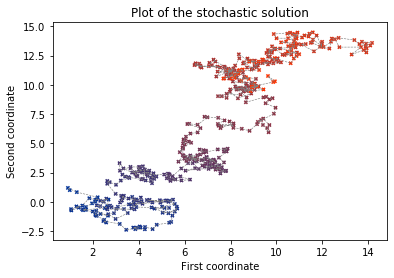

In [64]:
# Constant
u0 = np.array([1,1])
T = 50
dt = 0.1
n = int(T/dt)
sigma = 1
mu = 0

# Solution
U_stochastic = stochastic_euler(u0, dt, n, sigma, mu)

# Plot : time goes from blue to red
fig, ax = plt.subplots()
color = np.array([ [k/(n+1), 0.2, 0.6*(1 - k/(n+1))] for k in range(n+1)])
ax.scatter(U_stochastic[0,:], U_stochastic[1,:], s = 10,c=color, marker='x',linewidths=50)
plt.plot(U_stochastic[0,:], U_stochastic[1,:], '--', color='grey', linewidth=0.6)
plt.xlabel("First coordinate")
plt.ylabel("Second coordinate")
plt.title("Plot of the stochastic solution")

In this plot, I chose $\nu = 0$ and $\sigma =1$, which correspond to a random walk or Brownian motion. 

We can test that the expected value of $X(t)$ is equal at $X_0 \exp(\mu t)$. To do so, we will generate a high number of path, and then compute the discrete expected value using $$\mathbb{E} = \frac{1}{N} \sum_{i=1}^N X_i(T)$$

In [69]:
X_0 = np.array([1, 1])
T = 5
dt = 0.1
n = int(T/dt)
sigma = 1
mu = 0

nbr_of_walks = 1000
X_T = np.zeros((2, nbr_of_walks))
for k in range(nbr_of_walks):
    X_stochastic = stochastic_euler(X_0, dt, n, sigma, mu)
    X_T[:,k] = X_stochastic[:,-1]

avg = np.sum(X_T, 1)/nbr_of_walks


In [70]:
print(avg)
print(X_0*np.exp(T*mu))

[0.93363789 1.02700563]
[1. 1.]


Even if the expect value is near point $X_0 \exp(T \mu) = [\mu = 0] = X_0$, I am a little suprised that the approximation is not better.

## Conclusion

To conclude, let's recall that we have proposed two different schemes, implicit and explicit Euler to solve orinary differential equation. Implicit scheme is stronger in a sense that is stability region contains the stability region of explicit Euler, and seems more accurate. However, one of its drawback is that it requires to solve an equation, which size increases with the number of variable (or with the size of a spatial mesh, if we work with PDE). But since we can take larger time step, implicit method often requires, at the end, less computations than explicit one. Also, note that those methods are only first order accurate. Other method can be second, third.. accurate.